In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

def profiling_report(df):
    !pip install pandas-profiling==2.7.1
    from pandas_profiling import ProfileReport
    ProfileReport(df)
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

    #helps to make a full report
    profiling_report(df)

In [2]:
df = pd.read_excel(r"C:\Users\mohit\Downloads\MLSH-dataset-L1.xlsx")

In [3]:
df.head()

Participant Category     NN_RR      AVNN        IHR      SDNN    SDANN  \
0          0.0        A  0.999970   836.336  71.741501   74.9342  45.5641   
1          1.0        A  0.999680   980.794  61.174926   86.4631  57.3369   
2          2.0        A  0.993108  1000.260  59.984404   59.7562  32.5391   
3          3.0        A  0.959997   787.438  76.196475   59.2220  27.0160   
4          4.0        B  0.999689   973.366  61.641767  117.9690  67.9543   

   SDNNIDX    rMSSD    pNN10  ...     pNN40     pNN50   tot_pwr       ULF  \
0  55.4628  25.1387  61.3931  ...   6.17343   3.44122   5852.65  2675.950   
1  55.6853  26.9386  60.9649  ...   6.12600   3.87186   8793.63  4467.600   
2  47.8997  31.0587  59.4547  ...  10.53270   7.39094   3723.20  1336.050   
3  39.2539  43.5362  29.7286  ...  11.46800  10.68200   2813.47   761.872   
4  89.0453  73.9128  86.7052  ...  51.80280  44.24510  14734.80  6590.450   

       VLF        LF        HF    LF_HF      LF_n      HF_n  
0  2082.66   847.965   246.077  3.44593  0.775075  0.224925  
1  3145.01   985.214   195.798  5.03179  0.834212  0.165788  
2  1322.78   802.306   262.058  3.06156  0.753789  0.246211  
3  1339.35   361.275   350.971  1.02936  0.507233  0.492767  
4  4729.39  2354.480  1060.520  2.22012  0.689452  0.310548  

[5 rows x 22 columns]

In [4]:
df.isnull().sum()

Participant    0
Category       0
NN_RR          0
AVNN           0
IHR            0
SDNN           0
SDANN          0
SDNNIDX        0
rMSSD          0
pNN10          0
pNN20          0
pNN30          0
pNN40          0
pNN50          0
tot_pwr        0
ULF            0
VLF            0
LF             0
HF             0
LF_HF          0
LF_n           0
HF_n           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Participant  493 non-null    float64
 1   Category     493 non-null    object 
 2   NN_RR        493 non-null    float64
 3   AVNN         493 non-null    float64
 4   IHR          493 non-null    float64
 5   SDNN         493 non-null    float64
 6   SDANN        493 non-null    float64
 7   SDNNIDX      493 non-null    float64
 8   rMSSD        493 non-null    float64
 9   pNN10        493 non-null    float64
 10  pNN20        493 non-null    float64
 11  pNN30        493 non-null    float64
 12  pNN40        493 non-null    float64
 13  pNN50        493 non-null    float64
 14  tot_pwr      493 non-null    float64
 15  ULF          493 non-null    float64
 16  VLF          493 non-null    float64
 17  LF           493 non-null    float64
 18  HF           493 non-null    float64
 19  LF_HF   

In [6]:
categorical_eda(df)


To check: 
Unique count of non-numeric data

Category    2
dtype: int64
Top 5 unique values of Category
  Category  Count
0        A    424
1        B     69
 


In [7]:
top5(df)

Top 5 unique values of Category
  Category  Count
0        A    424
1        B     69
 



To check: 
Distribution of numeric data


count         mean          std         min          25%  \
Participant  493.0   246.000000   142.461106    0.000000   123.000000   
NN_RR        493.0     0.981825     0.052348    0.505680     0.992511   
AVNN         493.0   968.160154   133.007471  603.824000   883.495000   
IHR          493.0    63.159077     8.840921   42.931660    56.828945   
SDNN         493.0    78.424024    26.130325   16.380600    60.216500   
SDANN        493.0    54.558257    22.330160   14.341600    40.613500   
SDNNIDX      493.0    52.119256    21.442332    6.164800    36.929600   
rMSSD        493.0    37.225187    22.873266    5.234500    23.234800   
pNN10        493.0    62.116038    16.583218    1.763530    50.975200   
pNN20        493.0    34.741182    19.355675    1.063760    18.801200   
pNN30        493.0    24.231103    17.646819    0.346649     9.540980   
pNN40        493.0    14.806811    14.395127    0.097961     3.615990   
pNN50        493.0    10.998587    12.462205    0.062339     1.906120   
tot_pwr      493.0  7604.396846  5812.225631  283.458000  3916.660000   
ULF          493.0  3788.795093  3097.535438  229.128000  1853.600000   
VLF          493.0  2077.903732  1860.045593   43.255000   943.774000   
LF           493.0  1098.025386  1449.400257    7.756420   398.854000   
HF           493.0   639.678918   997.077270    3.318810   177.395000   
LF_HF        493.0     2.438171     1.674405    0.199845     1.187020   
LF_n         493.0     0.647561     0.146650    0.166559     0.542756   
HF_n         493.0     0.352439     0.146650    0.085771     0.231103   

                     50%          75%           max  
Participant   246.000000   369.000000    492.000000  
NN_RR           0.998159     0.999495      0.999971  
AVNN          957.889000  1055.800000   1397.570000  
IHR            62.637738    67.912099     99.366703  
SDNN           74.772200    90.530900    213.697000  
SDANN          50.316300    64.152700    256.855000  
SDNNIDX        48.272600    62.171600    187.348000  
rMSSD          31.836300    43.648000    204.545000  
pNN10          65.059300    75.042200     92.095300  
pNN20          33.865700    48.908100     82.915300  
pNN30          21.129800    35.519700     77.974800  
pNN40          10.237200    21.340600     72.164500  
pNN50           6.424260    15.917300     68.938400  
tot_pwr      6182.740000  9278.530000  48863.700000  
ULF          2908.120000  4590.610000  31032.300000  
VLF          1582.190000  2575.980000  16863.600000  
LF            718.052000  1296.960000  22251.300000  
HF            372.857000   659.454000   9287.110000  
LF_HF           2.042320     3.327080     10.659000  
LF_n            0.671303     0.768897      0.914229  
HF_n            0.328697     0.457244      0.833441

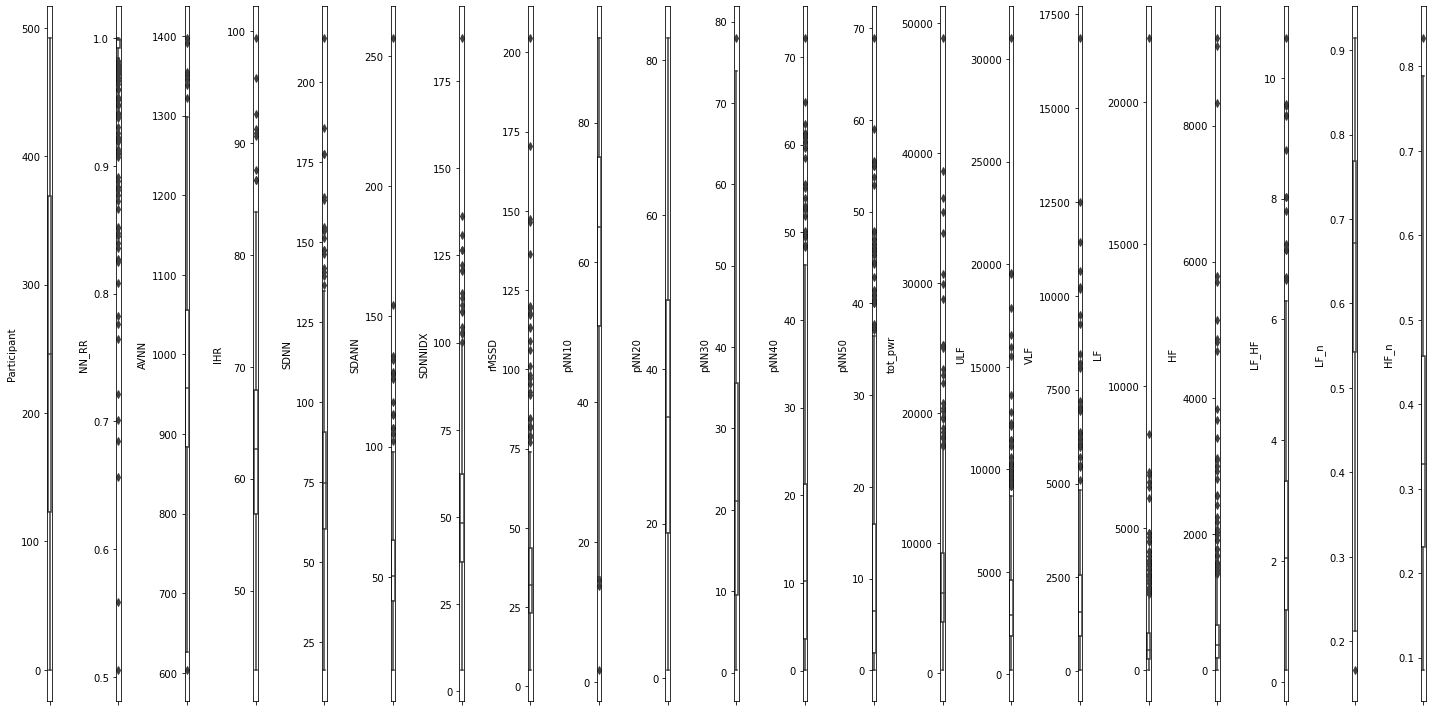


To check pairwise joint distribution of numeric data


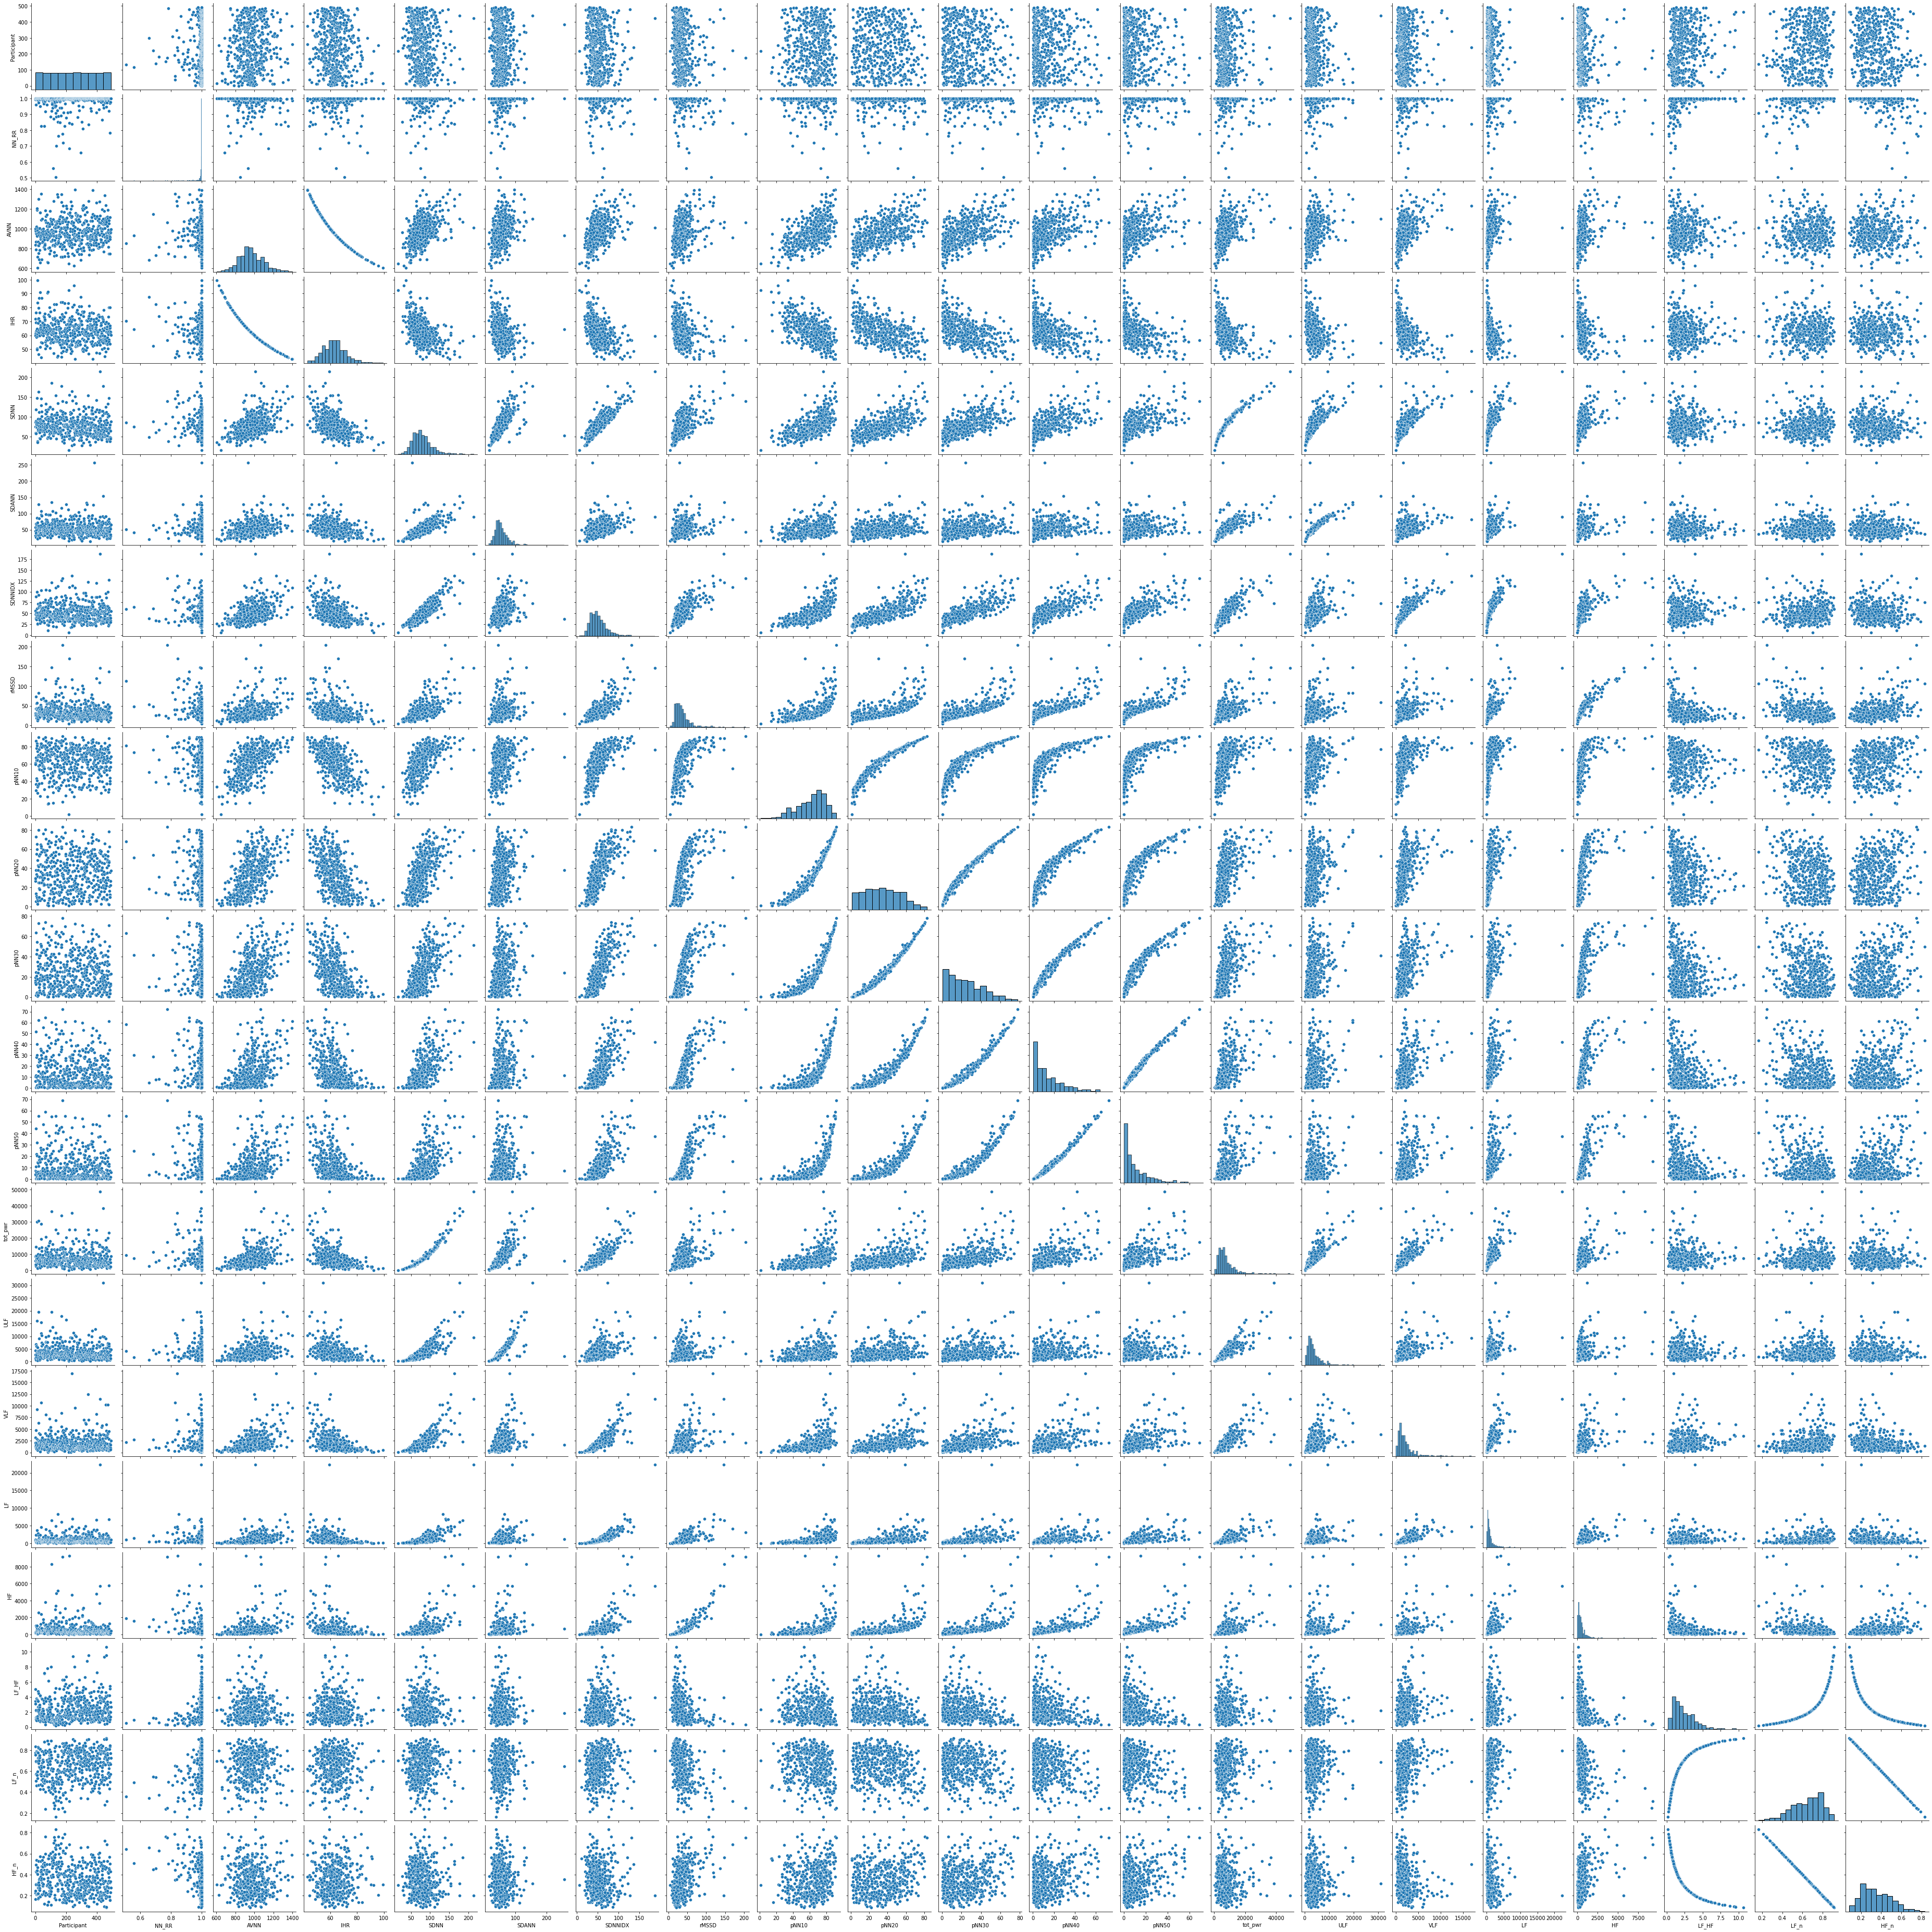

In [11]:
numeric_eda(df)

In [12]:
df.head()

Participant Category     NN_RR      AVNN        IHR      SDNN    SDANN  \
0          0.0        A  0.999970   836.336  71.741501   74.9342  45.5641   
1          1.0        A  0.999680   980.794  61.174926   86.4631  57.3369   
2          2.0        A  0.993108  1000.260  59.984404   59.7562  32.5391   
3          3.0        A  0.959997   787.438  76.196475   59.2220  27.0160   
4          4.0        B  0.999689   973.366  61.641767  117.9690  67.9543   

   SDNNIDX    rMSSD    pNN10  ...     pNN40     pNN50   tot_pwr       ULF  \
0  55.4628  25.1387  61.3931  ...   6.17343   3.44122   5852.65  2675.950   
1  55.6853  26.9386  60.9649  ...   6.12600   3.87186   8793.63  4467.600   
2  47.8997  31.0587  59.4547  ...  10.53270   7.39094   3723.20  1336.050   
3  39.2539  43.5362  29.7286  ...  11.46800  10.68200   2813.47   761.872   
4  89.0453  73.9128  86.7052  ...  51.80280  44.24510  14734.80  6590.450   

       VLF        LF        HF    LF_HF      LF_n      HF_n  
0  2082.66   847.965   246.077  3.44593  0.775075  0.224925  
1  3145.01   985.214   195.798  5.03179  0.834212  0.165788  
2  1322.78   802.306   262.058  3.06156  0.753789  0.246211  
3  1339.35   361.275   350.971  1.02936  0.507233  0.492767  
4  4729.39  2354.480  1060.520  2.22012  0.689452  0.310548  

[5 rows x 22 columns]

In [13]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [8]:
from pandas_profiling import ProfileReport
profile =ProfileReport(df)

In [10]:
profile.to_file("Analysis_By_Mohit.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


# ***I have also uploaded a Analysis_By_Mohit html file which contains almost every thing for analysis part.***

# Heatmap

<AxesSubplot:>

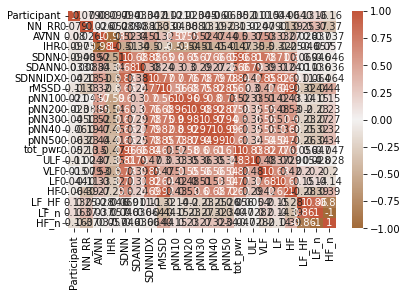

In [13]:
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(2200, 20, as_cmap=True))

# T_TEST

In [6]:
from scipy import stats
Group_A = df[(df['Category'] == 'A')]
Group_B = df[(df['Category'] == 'B')]

In [7]:
stats.ttest_ind(Group_A['IHR'] , Group_B['IHR'])

Ttest_indResult(statistic=-0.8626219352489725, pvalue=0.3887664936793025)

In [8]:
df.shape

(493, 22)

In [9]:
col = df.columns

In [10]:
col

Index(['Participant', 'Category', 'NN_RR', 'AVNN', 'IHR', 'SDNN', 'SDANN',
       'SDNNIDX', 'rMSSD', 'pNN10', 'pNN20', 'pNN30', 'pNN40', 'pNN50',
       'tot_pwr', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'LF_n', 'HF_n'],
      dtype='object')

In [11]:
col = col[2:]

In [12]:
col

Index(['NN_RR', 'AVNN', 'IHR', 'SDNN', 'SDANN', 'SDNNIDX', 'rMSSD', 'pNN10',
       'pNN20', 'pNN30', 'pNN40', 'pNN50', 'tot_pwr', 'ULF', 'VLF', 'LF', 'HF',
       'LF_HF', 'LF_n', 'HF_n'],
      dtype='object')

**All the T_TEST according to the two categories**

In [13]:
for i in range(len(col)):
  print(stats.ttest_ind(Group_A[col[i]] , Group_B[col[i]]))

Ttest_indResult(statistic=1.5838057688244298, pvalue=0.11388177591815506)
Ttest_indResult(statistic=0.557226878811793, pvalue=0.5776263485339017)
Ttest_indResult(statistic=-0.8626219352489725, pvalue=0.3887664936793025)
Ttest_indResult(statistic=-0.6764440501128773, pvalue=0.49907727753571063)
Ttest_indResult(statistic=-0.19454635015002486, pvalue=0.8458285747287833)
Ttest_indResult(statistic=-0.5823009416078738, pvalue=0.5606312755786298)
Ttest_indResult(statistic=-0.8645452536538666, pvalue=0.3877106003210373)
Ttest_indResult(statistic=2.000169427902313, pvalue=0.04603224116910303)
Ttest_indResult(statistic=1.0694734155301084, pvalue=0.28538187406295146)
Ttest_indResult(statistic=0.39920329686999434, pvalue=0.6899169865940828)
Ttest_indResult(statistic=-0.5357527846901167, pvalue=0.5923720128914398)
Ttest_indResult(statistic=-0.9723313720894281, pvalue=0.33136447706147887)
Ttest_indResult(statistic=-0.8483971555686262, pvalue=0.39663023248093565)
Ttest_indResult(statistic=-1.03312774

**Let's Check the Homogenity**

In [23]:
for i in col:
  print(stats.levene(Group_A[i] , Group_B[i]))

LeveneResult(statistic=2.2129300152299147, pvalue=0.13750042344638333)
LeveneResult(statistic=1.4082056410454726, pvalue=0.2359283466261123)
LeveneResult(statistic=2.4589319484257945, pvalue=0.11750242319108009)
LeveneResult(statistic=0.9904380837680491, pvalue=0.3201255222347328)
LeveneResult(statistic=0.28411600171022017, pvalue=0.5942572117029451)
LeveneResult(statistic=1.7641870117390512, pvalue=0.1847201727453757)
LeveneResult(statistic=1.3263361609060211, pvalue=0.25001853378273126)
LeveneResult(statistic=6.333615050763313, pvalue=0.012164633220736229)
LeveneResult(statistic=2.6110228477091693, pvalue=0.10676561319984619)
LeveneResult(statistic=1.6764396605450342, pvalue=0.19600674124541642)
LeveneResult(statistic=1.4520547752832036, pvalue=0.22877899262439924)
LeveneResult(statistic=1.6849547621172778, pvalue=0.19487679569860297)
LeveneResult(statistic=1.198781773082121, pvalue=0.2741020902738444)
LeveneResult(statistic=2.4578785805183125, pvalue=0.11758083001124212)
LeveneResul

**Walk test for Normality**

In [24]:
for i in col:
  print(stats.shapiro(Group_A[i]))

ShapiroResult(statistic=0.3619515299797058, pvalue=6.487599526922209e-36)
ShapiroResult(statistic=0.9886991381645203, pvalue=0.0023094145581126213)
ShapiroResult(statistic=0.9788655042648315, pvalue=7.588713742734399e-06)
ShapiroResult(statistic=0.943372368812561, pvalue=1.2144864974805714e-11)
ShapiroResult(statistic=0.850477933883667, pvalue=1.190365246486945e-19)
ShapiroResult(statistic=0.8977864980697632, pvalue=3.0674194395005096e-16)
ShapiroResult(statistic=0.7439287900924683, pvalue=4.437605874195309e-25)
ShapiroResult(statistic=0.9597349762916565, pvalue=2.259557652095623e-09)
ShapiroResult(statistic=0.9791261553764343, pvalue=8.676051947986707e-06)
ShapiroResult(statistic=0.9470555782318115, pvalue=3.5831771577621296e-11)
ShapiroResult(statistic=0.8599985837936401, pvalue=4.90832328479139e-19)
ShapiroResult(statistic=0.7925581932067871, pvalue=7.186541779225143e-23)
ShapiroResult(statistic=0.7809346914291382, pvalue=1.9724460348536338e-23)
ShapiroResult(statistic=0.82002365589

In [25]:
for i in col:
  print(stats.shapiro(Group_B[i]))

ShapiroResult(statistic=0.4499741792678833, pvalue=1.1960318667533429e-14)
ShapiroResult(statistic=0.9881398677825928, pvalue=0.7608804106712341)
ShapiroResult(statistic=0.9611349105834961, pvalue=0.030753200873732567)
ShapiroResult(statistic=0.9070998430252075, pvalue=8.383845852222294e-05)
ShapiroResult(statistic=0.8777053952217102, pvalue=6.484000095952069e-06)
ShapiroResult(statistic=0.9490954875946045, pvalue=0.007020923774689436)
ShapiroResult(statistic=0.885459840297699, pvalue=1.2307201359362807e-05)
ShapiroResult(statistic=0.9633676409721375, pvalue=0.04081690311431885)
ShapiroResult(statistic=0.9391277432441711, pvalue=0.0022223019041121006)
ShapiroResult(statistic=0.8998001217842102, pvalue=4.2886265873676166e-05)
ShapiroResult(statistic=0.8478269577026367, pvalue=6.637409342147294e-07)
ShapiroResult(statistic=0.8155145049095154, pvalue=7.442346117159104e-08)
ShapiroResult(statistic=0.7534565329551697, pvalue=2.001943055773836e-09)
ShapiroResult(statistic=0.6115260124206543,